In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\FREELANCE_PROJECTS\diabetes-client-readmit-prediction\data\diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.shape

(101766, 50)

In [4]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

(       encounter_id   patient_nbr  admission_type_id  \
 count  1.017660e+05  1.017660e+05      101766.000000   
 mean   1.652016e+08  5.433040e+07           2.024006   
 std    1.026403e+08  3.869636e+07           1.445403   
 min    1.252200e+04  1.350000e+02           1.000000   
 25%    8.496119e+07  2.341322e+07           1.000000   
 50%    1.523890e+08  4.550514e+07           1.000000   
 75%    2.302709e+08  8.754595e+07           3.000000   
 max    4.438672e+08  1.895026e+08           8.000000   
 
        discharge_disposition_id  admission_source_id  time_in_hospital  \
 count             101766.000000        101766.000000     101766.000000   
 mean                   3.715642             5.754437          4.395987   
 std                    5.280166             4.064081          2.985108   
 min                    1.000000             1.000000          1.000000   
 25%                    1.000000             1.000000          2.000000   
 50%                    1.000000   

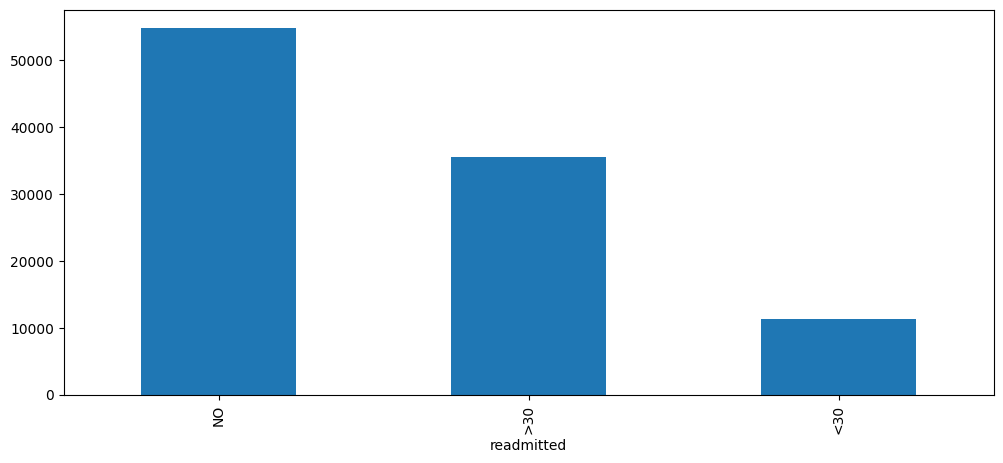

In [6]:
data["readmitted"].value_counts().plot.bar(figsize=(12, 5));

In [7]:
data['readmitted'] = data.readmitted.apply(lambda x: 1 if x == '<30' or '>30' else 0)

In [8]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,1
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [9]:
new_data = data[['age', 
      'gender', 
      'time_in_hospital', 
      'num_lab_procedures', 
      'num_procedures', 
      'num_medications', 
      'number_outpatient', 
      'number_emergency', 
      'number_inpatient', 
      'number_diagnoses',
     'change',
    'readmitted']]

In [10]:
new_data.head()

,age,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,readmitted
0,[0-10),Female,1,41,0,1,0,0,0,1,No,1
1,[10-20),Female,3,59,0,18,0,0,0,9,Ch,1
2,[20-30),Female,2,11,5,13,2,0,1,6,No,1
3,[30-40),Male,2,44,1,16,0,0,0,7,Ch,1
4,[40-50),Male,1,51,0,8,0,0,0,5,Ch,1


In [11]:
new_data.isnull().sum()

age                   0
gender                0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
change                0
readmitted            0
dtype: int64

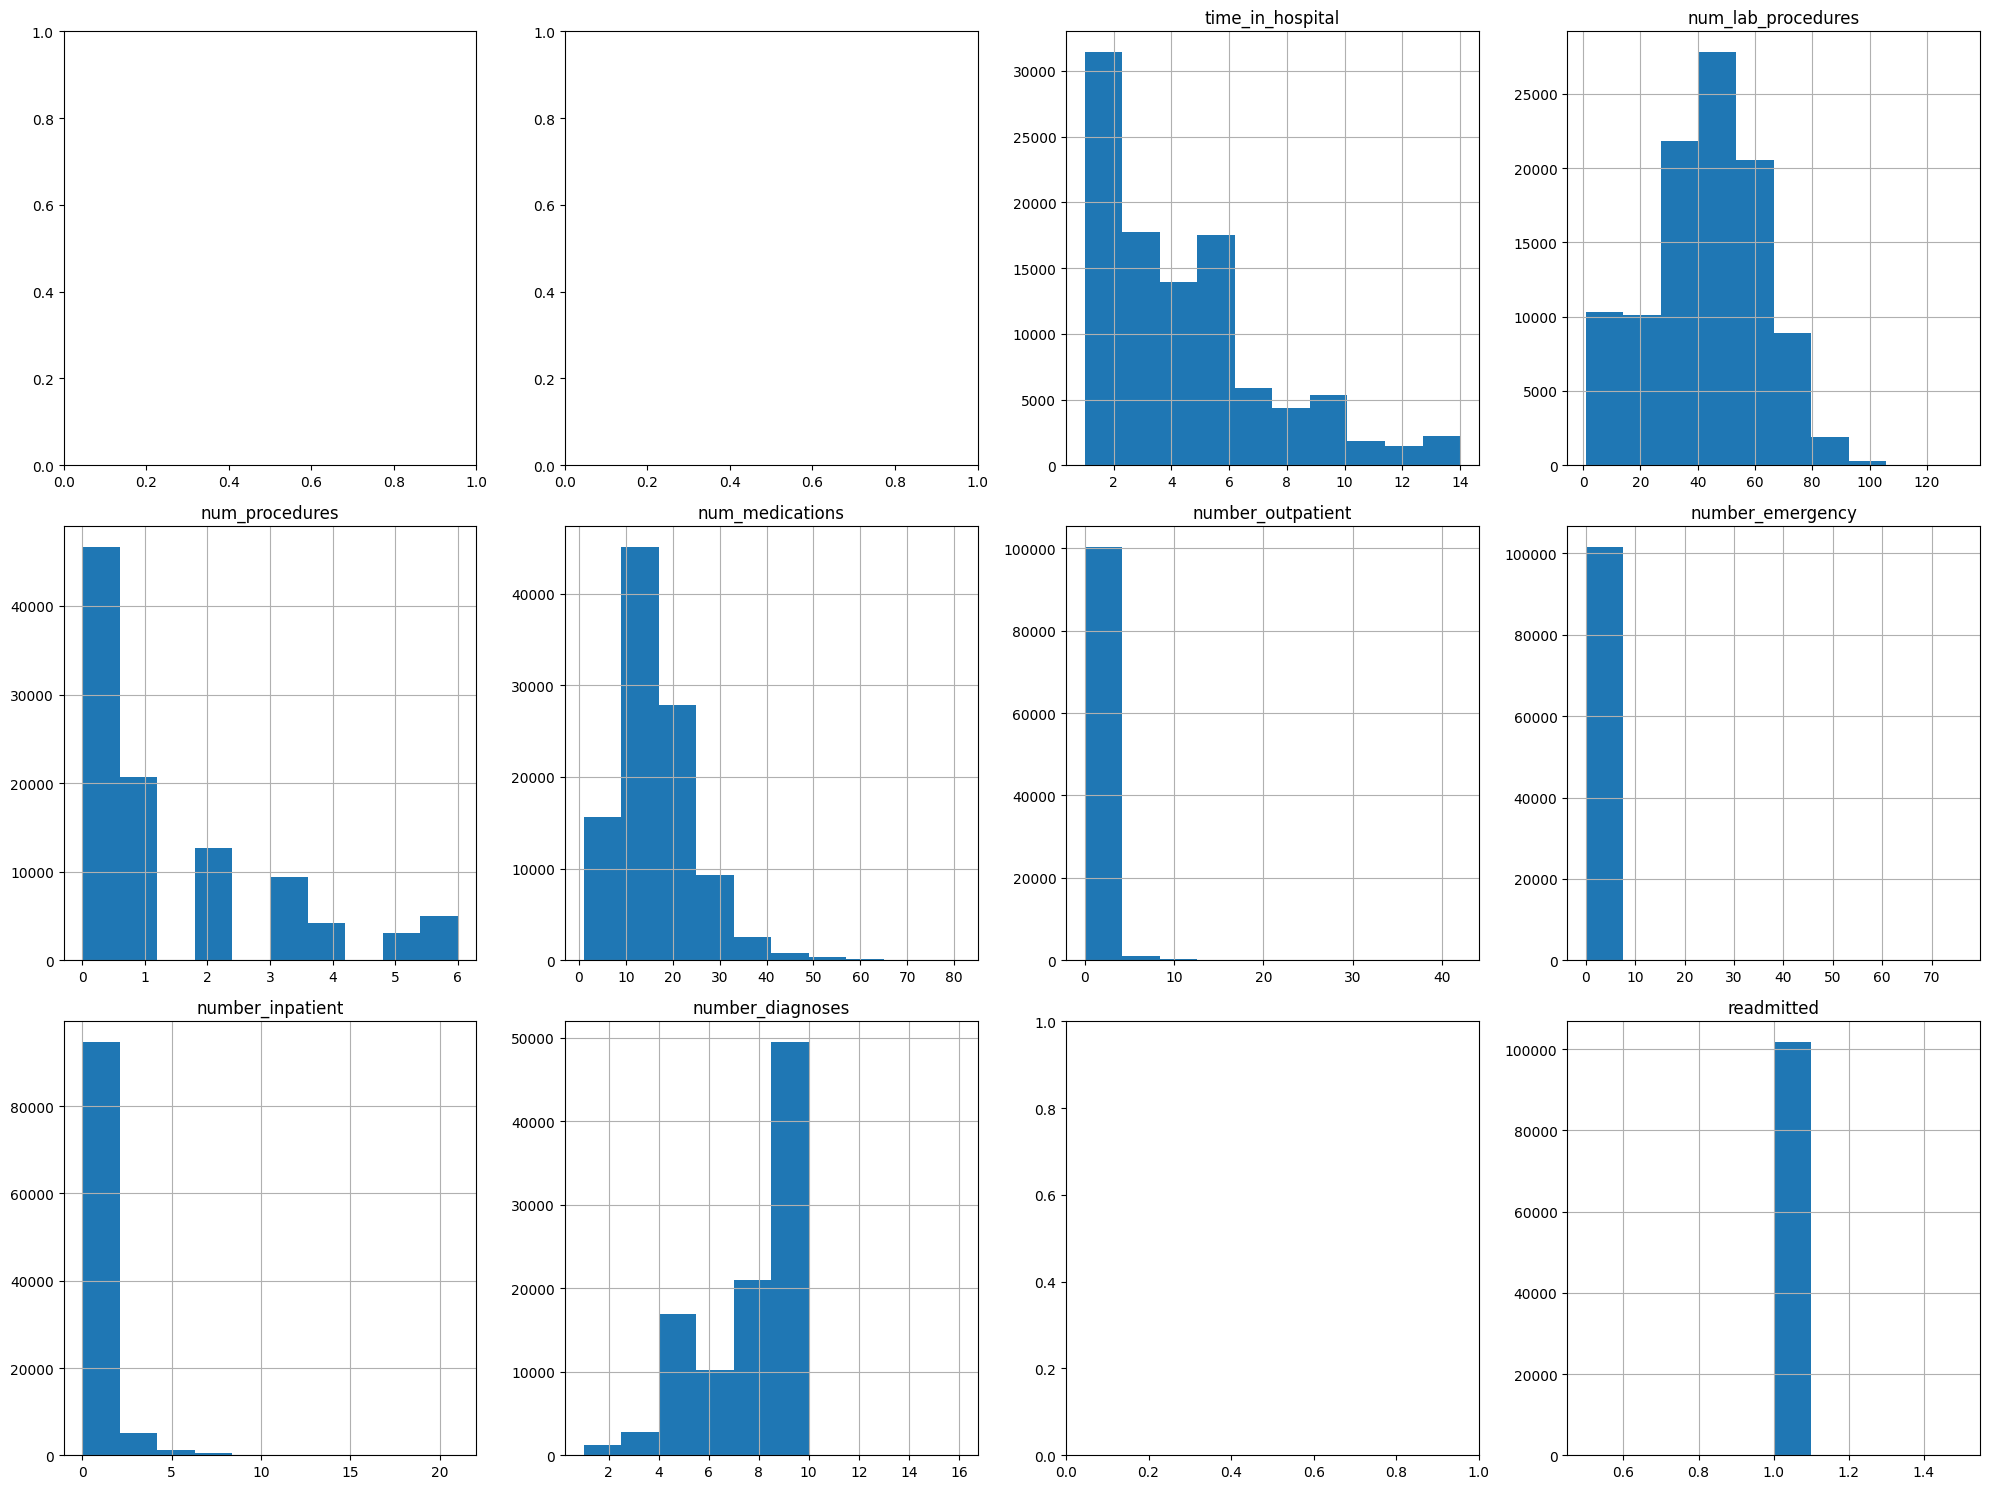

In [16]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(new_data.columns):
    if new_data[col].dtype in ['int64', 'float64']:
        new_data[col].hist(ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout()
plt.show()